## Deep Learning Demo

Here is a simple program to train a deep learning model
Usually it is recommended to use GPU to train a CNN.
Based on our dataset, it takes ~1min to train a single epoch using CPU, while only 10s when using a GPU.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.18.0


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import collections

%matplotlib inline

## Load Dataset

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [6]:
label_counts = collections.Counter(y_train)
sorted(label_counts.items(), key=lambda x: x[0])

[(np.uint8(0), 5923),
 (np.uint8(1), 6742),
 (np.uint8(2), 5958),
 (np.uint8(3), 6131),
 (np.uint8(4), 5842),
 (np.uint8(5), 5421),
 (np.uint8(6), 5918),
 (np.uint8(7), 6265),
 (np.uint8(8), 5851),
 (np.uint8(9), 5949)]

In [7]:
def show_image(image):
    plt.imshow(image, cmap='Greys')

Label: 3


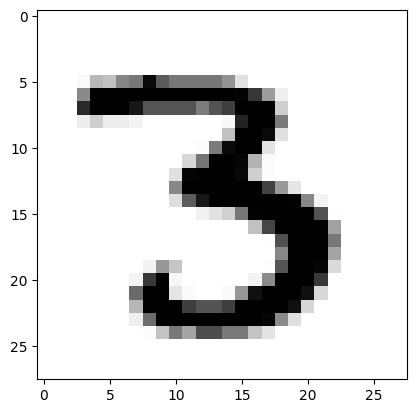

In [8]:
image_index = 12
show_image(x_train[image_index])
print(f"Label: {y_train[image_index]}")

In [9]:
x_train.dtype

dtype('uint8')

## Input preprocessing

- Reshape dataset by adding channel dimension (as required by Keras API)
- Normalize data

In [10]:
# Add depth channel: [batch_size (None), height, width, depth]
x_train = np.expand_dims(x_train, -1).astype('float32')
x_test = np.expand_dims(x_test, -1).astype('float32')
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [11]:
# Normalization

In [12]:
print(x_train.max(), ", ", x_train.min())

255.0 ,  0.0


In [13]:
x_train /= x_train.max()
x_test /= x_train.max()

In [14]:
print(x_train.max(), ", ", x_train.min())

1.0 ,  0.0


## Build (Vanila) Deep Neural Network

We will build a netowrk with the following layers:
- Dense layer with (512, 256, 10)
- Output layer with softmax

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [16]:
model = Sequential()

# Add Flatten: [batch_size, 28, 28, 1] -> [batch_size, 28 * 28 * 1]
model.add(tf.keras.Input(shape=(28, 28, 1, )))
model.add(Flatten())
model.add(Dense(512, 'relu'))
model.add(Dense(256, 'sigmoid'))
model.add(Dense(10, 'softmax')) # for 10 class classification

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 535,818 (2.04 MB)

 Trainable params: 535,818 (2.04 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# optimizer: sgd, momentum, adagram, rmsprop, adam
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

In [19]:
history = model.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    validation_data=(x_test, y_test),
    epochs=10
)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.8181 - loss: 0.7090 - val_accuracy: 0.9472 - val_loss: 0.1813
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9558 - loss: 0.1531 - val_accuracy: 0.9637 - val_loss: 0.1247
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9731 - loss: 0.0933 - val_accuracy: 0.9713 - val_loss: 0.1032
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9797 - loss: 0.0666 - val_accuracy: 0.9778 - val_loss: 0.0775
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9865 - loss: 0.0469 - val_accuracy: 0.9791 - val_loss: 0.0789
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9912 - loss: 0.0334 - val_accuracy: 0.9776 - val_loss: 0.0825
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9938 - loss: 0.0247 - val_accuracy: 0.9793 - val_loss: 0.0823
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9950 - loss: 0.0188 - val_accuracy: 0

In [20]:
def plot_history(history, metrics):
    for metric in metrics:
        plt.plot(history.history[metric], '-o', label=metric)
    plt.legend()

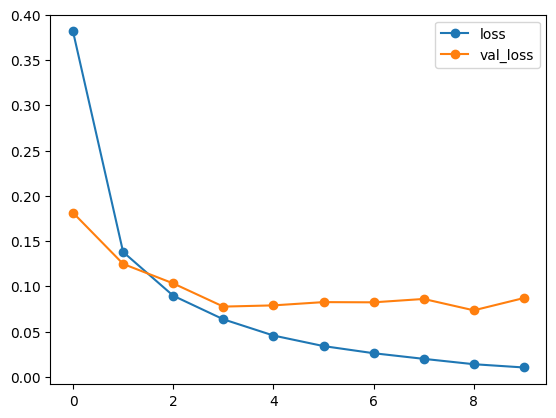

In [21]:
plot_history(history, metrics=['loss', 'val_loss'])

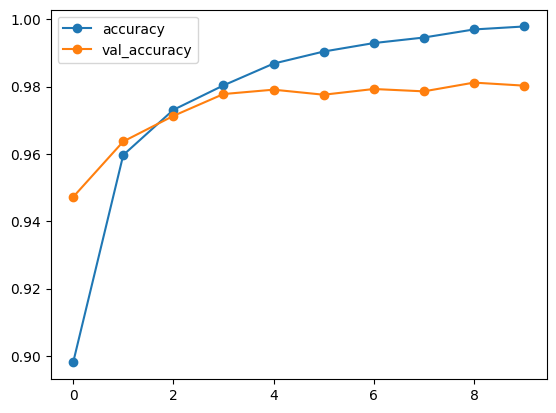

In [22]:
plot_history(history, metrics=['accuracy', 'val_accuracy'])

## Build the Convolutional Neural Network

We will build a netowrk with the following layers:
- Convolutional layer with 10 3X3 kernels
- Max Pooling layer with 2X2 tile
- Flatten layer to convert 2D image into a 1D vector
- Fully connected layer with 128 units
- Output layer with softmax

In [23]:
cnn = Sequential(name='cnn')

# Conv2D
cnn.add(tf.keras.Input(shape=(28, 28, 1, )))
cnn.add(Conv2D(5, kernel_size=(3, 3)))
# cnn.add(MaxPool2D())
cnn.add(Flatten())
cnn.add(Dense(128, 'relu'))
cnn.add(Dense(10, 'softmax'))

In [24]:
cnn.summary()

Model: "cnn"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 5)      │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3380)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       432,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 434,108 (1.66 MB)

 Trainable params: 434,108 (1.66 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# optimizer: sgd, momentum, adagram, rmsprop, adam
cnn.compile(
    optimizer='adam',
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# Homework: Try different optimizer and different cnn architecture, such as different filters, kernel size, etc

In [26]:
history = cnn.fit(
    x=x_train,
    y=y_train,
    batch_size=256,
    validation_data=(x_test, y_test),
    epochs=5
)

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8501 - loss: 0.5131 - val_accuracy: 0.9448 - val_loss: 26.2375
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9561 - loss: 0.1498 - val_accuracy: 0.9671 - val_loss: 15.3693
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9704 - loss: 0.0976 - val_accuracy: 0.9650 - val_loss: 17.6406
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9774 - loss: 0.0709 - val_accuracy: 0.9716 - val_loss: 15.7135
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9835 - loss: 0.0547 - val_accuracy: 0.9685 - val_loss: 18.0659


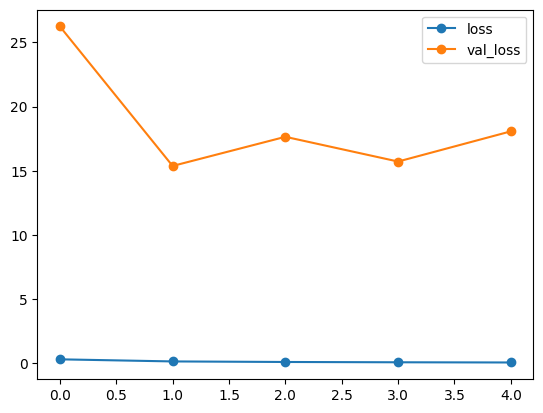

In [27]:
plot_history(history, metrics=['loss', 'val_loss'])

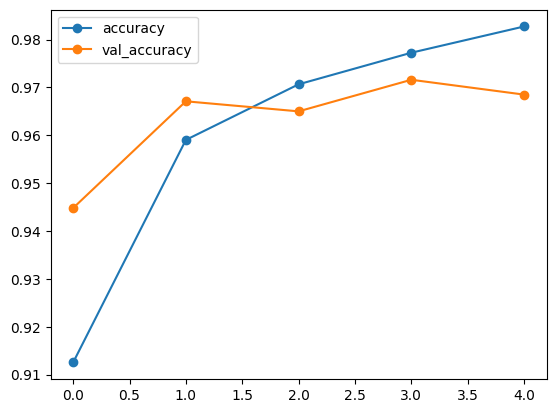

In [28]:
plot_history(history, metrics=['accuracy', 'val_accuracy'])

## Predict

In [29]:
def predict_image(model, image):
    show_image(np.reshape(image, [28, 28]))
    pred = model.predict(np.reshape(image, [1, 28, 28, 1]))
    print("Predicted number: ", pred.argmax())

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
Predicted number:  9


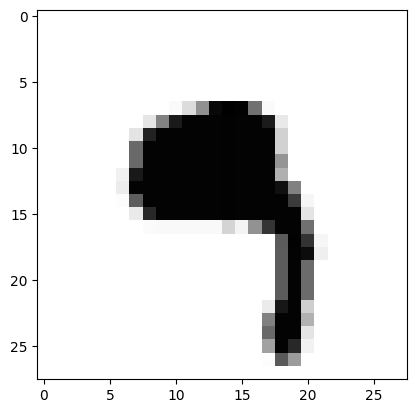

In [30]:
test_image_index = 209
test_image = x_test[test_image_index]
predict_image(model, test_image)